In [ ]:
import warnings 
warnings.filterwarnings('ignore')

In [57]:
from statsmodels.tsa.seasonal import seasonal_decompose # type: ignore

import pandas as pd

import yfinance as yf

from datetime import datetime, timedelta


/Users/johnwong/anaconda3/lib/python3.10/site-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [58]:
#symbol and date range parameters
sym = "SPY"
end_date = datetime.today()
start_date = end_date - timedelta(days = 5*365)

In [59]:
#download data from yahoo finance
data = yf.download(sym, start = start_date,end = end_date)
data_orig[sym] = data['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [67]:
#preview the data
data_orig.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,SPY
0,2019-04-29,293.510010,294.450012,293.410004,293.869995,271.171051,57197700,NaN
1,2019-04-30,293.489990,294.339996,291.920013,294.019989,271.309479,81111700,NaN
2,2019-05-01,294.720001,294.950012,291.799988,291.809998,269.270233,71671900,NaN
3,2019-05-02,291.679993,292.700012,289.519989,291.179993,268.688843,65030200,NaN
4,2019-05-03,292.820007,294.339996,291.299988,294.029999,271.318665,56543700,NaN
5,2019-05-06,289.250000,293.309998,288.899994,292.820007,270.202179,107198100,NaN
6,2019-05-07,290.149994,290.809998,285.809998,287.929993,265.689819,144729900,NaN
7,2019-05-08,287.529999,289.429993,286.869995,287.529999,265.320770,91568300,NaN
8,2019-05-09,285.230011,287.329987,283.299988,286.660004,264.517944,103471100,NaN
9,2019-05-10,285.619995,288.940002,282.299988,288.100006,265.846710,112429300,NaN


In [72]:
#format date and plot the adj price in chart for the symbol
data_orig['Date'] = pd.to_datetime(data_orig['Date'])

analysis = data_orig[['Date','Adj Close']]


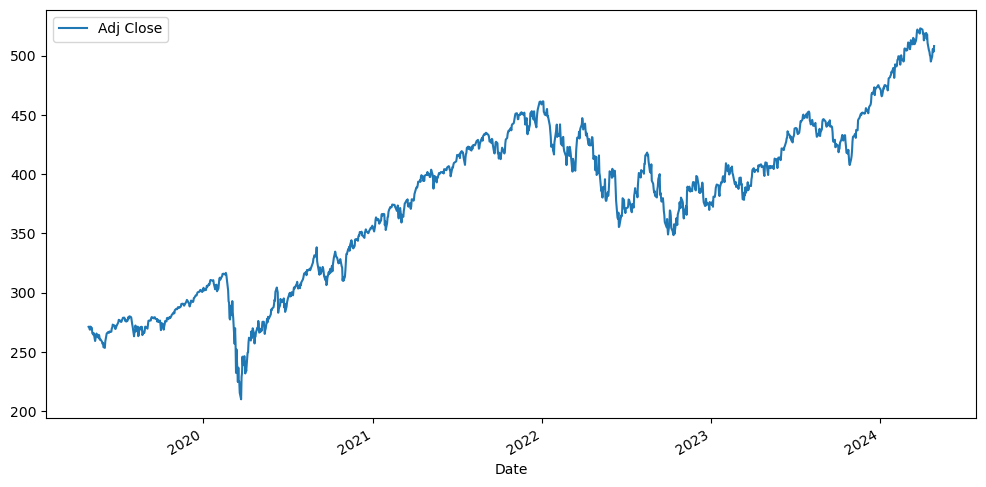

In [73]:
ax = analysis.plot(x='Date', y='Adj Close', figsize=(12,6))

In [74]:
#prepare data for time series decompose
analysis.set_index('Date', inplace=True)
analysis

,Adj Close
Date,
2019-04-29,271.171051
2019-04-30,271.309479
2019-05-01,269.270233
2019-05-02,268.688843
2019-05-03,271.318665
...,...
2024-04-22,499.720001
2024-04-23,505.649994
2024-04-24,505.410004


In [75]:
#resample data into weekly period.  Model may fail due to missing daily data
analysis = analysis.resample("W").last()


In [76]:
#preview data
analysis.head(10)

,Adj Close
Date,
2019-05-05,271.318665
2019-05-12,265.846710
2019-05-19,263.761261
2019-05-26,260.937653
2019-06-02,254.007736
2019-06-09,265.431458
2019-06-16,266.917175
2019-06-23,272.610474
2019-06-30,271.683228


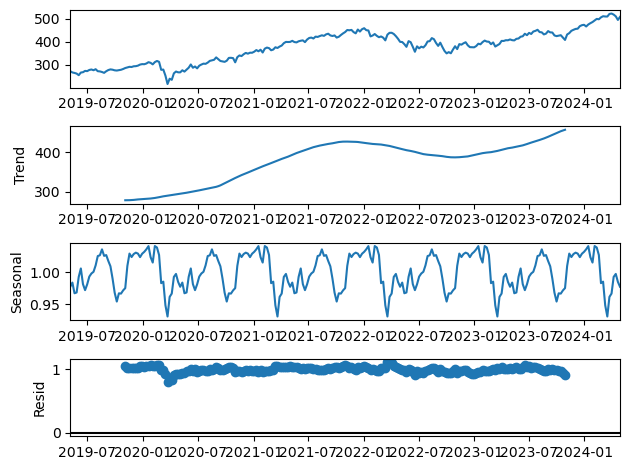

In [79]:
#decompose time series with 'multiplicative'
decompose_result_mult = seasonal_decompose(analysis, model="multiplicative")

trend = decompose_result_mult.trend
seasonal = decompose_result_mult.seasonal
residual = decompose_result_mult.resid

decompose_result_mult.plot();